# Visualise the pre-trained agent in action

Modify the path to the weights and run the notebook.

In [66]:
WEIGHTS = './weights-5000'  # NB: without '.pth'
METRICS = './metrics.csv'

In [67]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

from upload.agent import VisionDeepQ

sys.path.append('../')
from utilities import visualisation  # noqa

## Parameters

In [8]:
network = {
    "input_channels": 10, "outputs": 8,
    "channels": [32, 64, 64],
    "kernels": [8, 4, 3],
    "padding": ["valid", "valid", "valid"],
    "strides": [4, 2, 1],
    "nodes": [512],
}
optimizer = {
    "optimizer": torch.optim.Adam,
    "lr": 0.00025,
    "hyperparameters": {}
}
shape = {
    "original": (1, 1, 210, 160),
    "height": slice(51, 155),
    "width": slice(8, 160)
}
skip = 4

## Setup

In [9]:
value_agent = VisionDeepQ(
    network=network, optimizer=optimizer, shape=shape,
    exploration_rate=0.01,
)

weights = torch.load(f'{WEIGHTS}.pth', map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Enduro-v5', render_mode="rgb_array",
                       obs_type="grayscale", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


## Visualise

### Plotting the metrics from the csv-file created during training.

IndexError: index 0 is out of bounds for axis 0 with size 0

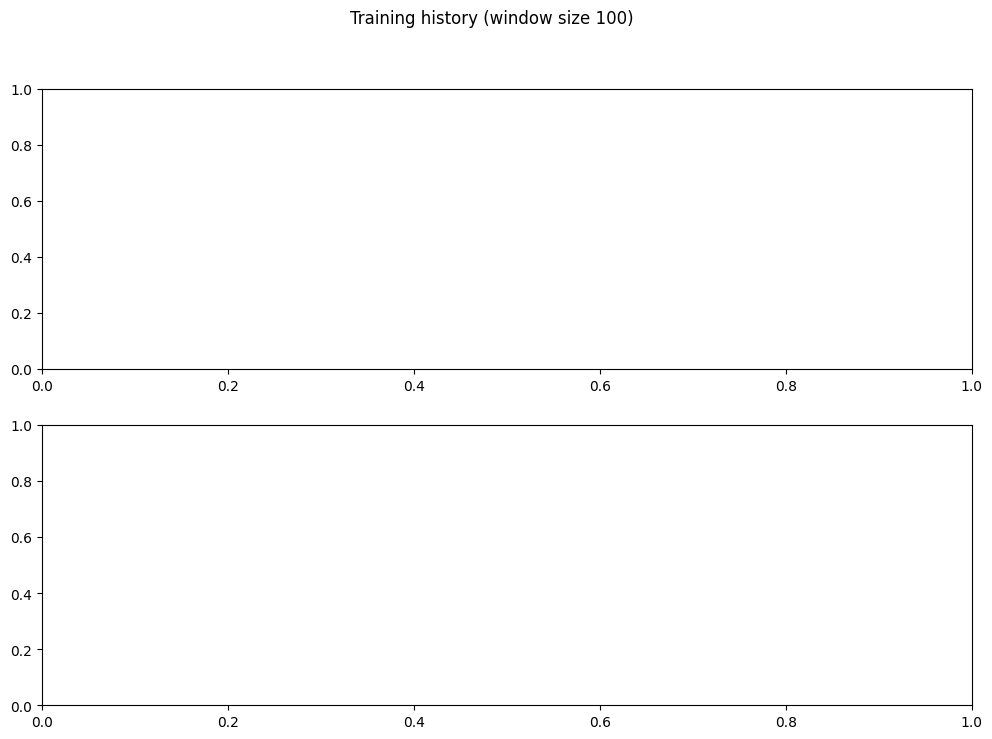

In [68]:
visualisation.graph(METRICS, title="Training history", window=50) if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [44]:
visualisation.gif(environment, value_agent, f'./{WEIGHTS}.gif', skip)